In [1]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
prod = 'NG=F'
data = yf.download(prod,auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2000-08-30,4.65,4.815,4.63,4.805,34954
2000-08-31,4.82,4.870,4.74,4.780,25787
2000-09-01,4.75,4.860,4.75,4.835,113
2000-09-05,4.85,4.975,4.84,4.960,26096
2000-09-06,4.99,5.110,4.96,5.065,32764


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5250 entries, 2000-08-30 to 2021-09-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5250 non-null   float64
 1   High    5250 non-null   float64
 2   Low     5250 non-null   float64
 3   Close   5250 non-null   float64
 4   Volume  5250 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 246.1 KB


In [4]:
data.shape

(5250, 5)

In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000
mean,4.504986,4.605520,4.403409,4.500646,98789.076381
std,2.260513,2.321159,2.201995,2.259166,63109.498328
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.842250,2.897250,2.788250,2.843000,42840.500000
50%,3.861000,3.940000,3.786500,3.855500,89992.500000
75%,5.620000,5.763500,5.507250,5.634500,142130.250000
max,15.160000,15.780000,14.851000,15.378000,459196.000000


<function matplotlib.pyplot.show(close=None, block=None)>

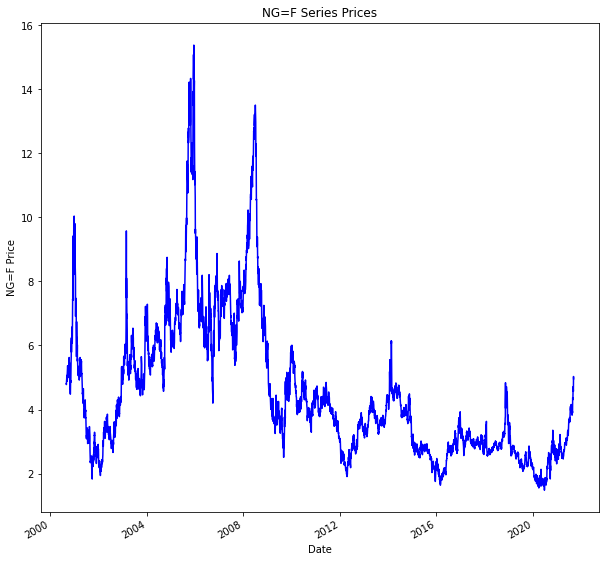

In [6]:
data.Close.plot(figsize=(10,10),color='blue')
plt.ylabel('{} Price'.format(prod))
plt.title('{} Series Prices'.format(prod))
plt.show

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

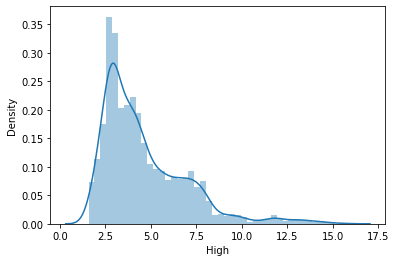

In [7]:
sns.distplot(data['High'])

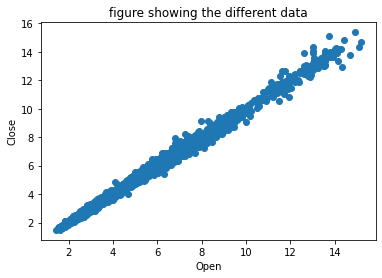

In [8]:
fig,ax = plt.subplots()
ax.scatter(x=data['Open'],y=data['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('figure showing the different data')
plt.show()

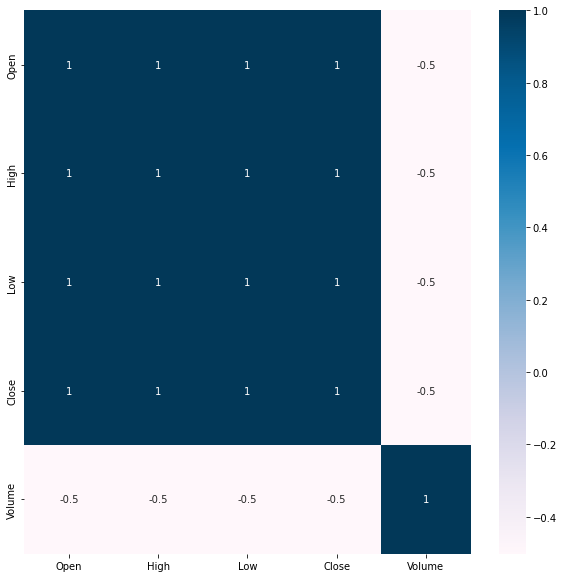

In [9]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.PuBu)
plt.show()

In [17]:
X = data.drop('Close',axis=1)
y = data['Close']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test, = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=0)

In [18]:
print(data.shape)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(5250, 5)
(1050, 4)
(4200, 4)
(1050,)
(4200,)


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)
lrpred = lr.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error,r2_score

def calculate_error(y_test,pred):
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test,pred)

    print(mse)
    print(rmse)
    print(r2_scors)

In [30]:
calculate_error(y_test,lrpred)

0.005350241668021854
0.07314534618157094
0.998815458513961


In [31]:
from sklearn.linear_model import Lasso,Ridge

la = Lasso().fit(X_train,y_train)
ri = Ridge().fit(X_train,y_train)

lapred = la.predict(X_test)
ripred = ri.predict(X_test)

In [32]:
calculate_error(y_test,lapred)
print('-----------------------')
calculate_error(y_test,ripred)

0.21280685794696994
0.46130993696967976
0.9528846419670276
-----------------------
0.005301737643671429
0.0728130321005205
0.9988261972866461


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

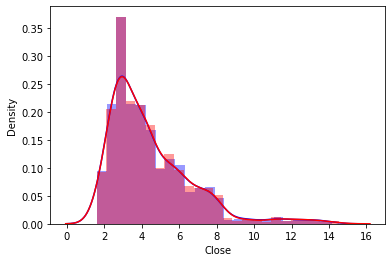

In [ ]:
sns.distplot(y_test,color='blue')
sns.distplot(ripred,color='red')

In [ ]:
mypred = ri.predict([[4.65,4.815,4.63,34954]])
print(mypred)

[4.76074827]


In [ ]:
mypred1 = lr.predict([[4.65,4.815,4.63,34954]])
print(mypred1)

[4.76385445]


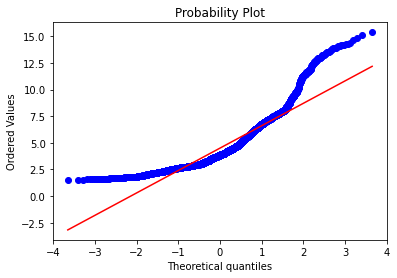

In [ ]:
from scipy import stats # this figure tell us if the set of data follows a normal distribution in which the data pints should be staraight line 
fig = plt.figure()
res = stats.probplot(data['Close'],plot=plt)
plt.show()

In [ ]:
print(data['Close'].skew())
print(data['Close'].kurt())

1.5263967479581506
2.7572113218025467


In [33]:
import joblib
joblib.dump(ri,'model.pkl')
model = joblib.load('model.pkl')